In [1]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
os.getcwd()

'c:\\Users\\adina\\Desktop\\3rd year'

In [4]:
train_dir = './parkinsons_dataset/train/'
val_dir = './parkinsons_dataset/validation/'

**Data Loading and Augmentation**

In [5]:
train_batches = ImageDataGenerator(rotation_range=40, width_shift_range=0.2, height_shift_range=0.2, rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest').flow_from_directory(directory=train_dir, target_size=(224,224), classes=['normal', 'parkinson'], batch_size=10)

val_batches = ImageDataGenerator(rotation_range=40, width_shift_range=0.2, height_shift_range=0.2, rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest').flow_from_directory(directory=val_dir, target_size=(224,224), classes=['normal', 'parkinson'], batch_size=10)


Found 700 images belonging to 2 classes.
Found 131 images belonging to 2 classes.


**Plotting images**

In [12]:
imgs, labels = next(train_batches)

In [13]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

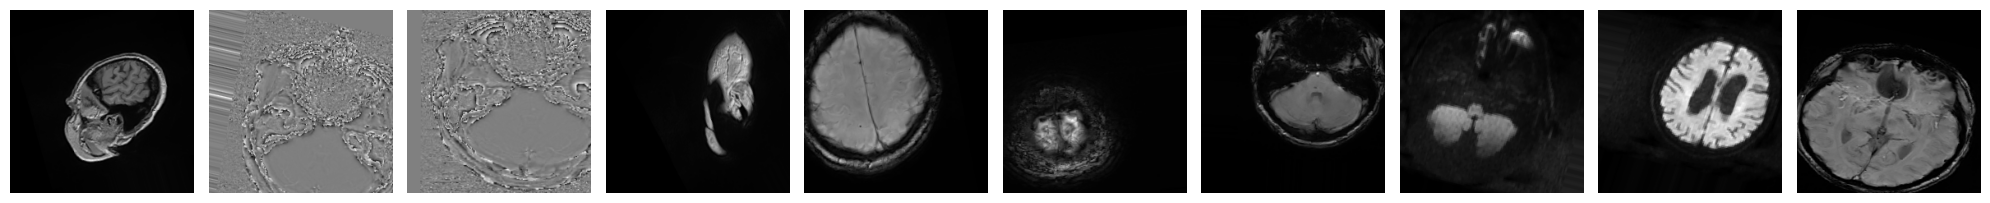

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]]


In [14]:
plotImages(imgs)
print(labels)

**Model making**

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from sklearn.metrics import confusion_matrix

In [16]:
model = Sequential([
    Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding = 'same', input_shape = (224, 224, 3)),
    MaxPool2D(pool_size=(2,2), strides=2),
    Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'),
    MaxPool2D(pool_size=(2,2), strides=2),
    Flatten(),
    Dense(units=2, activation='softmax')
])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 200704)            0         
                                                                 
 dense (Dense)               (None, 2)                 4

In [18]:
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

In [19]:
history = model.fit(
    x=train_batches, 
    validation_data=val_batches, 
    epochs=12, 
    verbose=2,
)

Epoch 1/12
70/70 - 19s - loss: 0.6019 - accuracy: 0.6829 - val_loss: 0.6031 - val_accuracy: 0.8397 - 19s/epoch - 277ms/step
Epoch 2/12
70/70 - 18s - loss: 0.5485 - accuracy: 0.7214 - val_loss: 0.5128 - val_accuracy: 0.8321 - 18s/epoch - 259ms/step
Epoch 3/12
70/70 - 18s - loss: 0.4995 - accuracy: 0.7443 - val_loss: 0.4864 - val_accuracy: 0.8397 - 18s/epoch - 252ms/step
Epoch 4/12
70/70 - 17s - loss: 0.4984 - accuracy: 0.7557 - val_loss: 0.4541 - val_accuracy: 0.8244 - 17s/epoch - 243ms/step
Epoch 5/12
70/70 - 17s - loss: 0.4543 - accuracy: 0.7757 - val_loss: 0.6293 - val_accuracy: 0.7176 - 17s/epoch - 238ms/step
Epoch 6/12
70/70 - 16s - loss: 0.4218 - accuracy: 0.8029 - val_loss: 0.5251 - val_accuracy: 0.8092 - 16s/epoch - 231ms/step
Epoch 7/12
70/70 - 17s - loss: 0.4120 - accuracy: 0.8100 - val_loss: 0.5081 - val_accuracy: 0.8321 - 17s/epoch - 236ms/step
Epoch 8/12
70/70 - 17s - loss: 0.3921 - accuracy: 0.8300 - val_loss: 0.5720 - val_accuracy: 0.7176 - 17s/epoch - 243ms/step
Epoch 9/

In [20]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [21]:
model.save('basic5_80.keras')

**Testing Data**

In [22]:
test_batches = ImageDataGenerator(rotation_range=40, width_shift_range=0.2, height_shift_range=0.2, rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest', preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=val_dir, target_size=(224,224), classes=['normal', 'parkinson'], batch_size=10, shuffle=False)

Found 131 images belonging to 2 classes.


In [23]:
model = tf.keras.models.load_model('models/Basic/basic4_84.h5')

In [24]:
tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True, show_layer_activations=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [31]:
test_imgs, test_labels = next(train_batches)
# plotImages(test_imgs)
print(test_labels)

[[0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]]


In [32]:
predictions = model.predict(x=test_imgs, verbose=1)

1/1 [==============================] - 0s 64ms/step


In [33]:
np.round(predictions[:10])

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)